>About Dataset

* RowNumber—corresponds to the record (row) number and has no effect on the output.

* CustomerId—contains random values and has no effect on customer leaving the bank.

* Surname—the surname of a customer has no impact on their decision to leave the bank.

* CreditScore—can have an effect on customer churn, since a customer with a higher credit score is less likely to leave the bank.

* Geography—a customer’s location can affect their decision to leave the bank.

* Gender—it’s interesting to explore whether gender plays a role in a customer leaving the bank.

* Age—this is certainly relevant, since older customers are less likely to leave their bank than younger ones.

* Tenure—refers to the number of years that the customer has been a client of the bank. Normally, older clients are more loyal and less likely to leave a bank.
* Balance—also a very good indicator of customer churn, as people with a higher balance in their accounts are less likely to leave the bank compared to those with lower balances.
* NumOfProducts—refers to the number of products that a customer has purchased through the bank.
* HasCrCard—denotes whether or not a customer has a credit card. This column is also relevant, since people with a credit card are less likely to leave the bank.
* IsActiveMember—active customers are less likely to leave the bank.
* EstimatedSalary—as with balance, people with lower salaries are more likely to leave the bank compared to those with higher salaries.
* Exited—whether or not the customer left the bank.

 Import all the necessary libraries needed for analysis and modelling.


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score

Read data using pandas library. we can see the data has 14 features.
We use .head() function to view the first 5 columns.


In [2]:
df = pd.read_csv('churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


The .info() function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame. 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


.describe().T is methode to know the statistical overview from the data

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


 The data has 10000 rows and 14 columns

In [5]:
df.shape

(10000, 14)

This methode is used to check the null data from each column. there are no missing value from this dataset. 

In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

.dtypes: return the dtypes in the DataFrame from each column.

In [7]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

Since "RowNumber," "CustomerId," and "Surname" columns are not required in this analysis project because they have no bearing on the issue to be solved. We can eliminate that column using .drop method with the parameter inplace=True to  modified in place, which means it will return nothing and the dataframe is now updated.


In [9]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)


In [10]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb273b67590>,
      dtype=object)

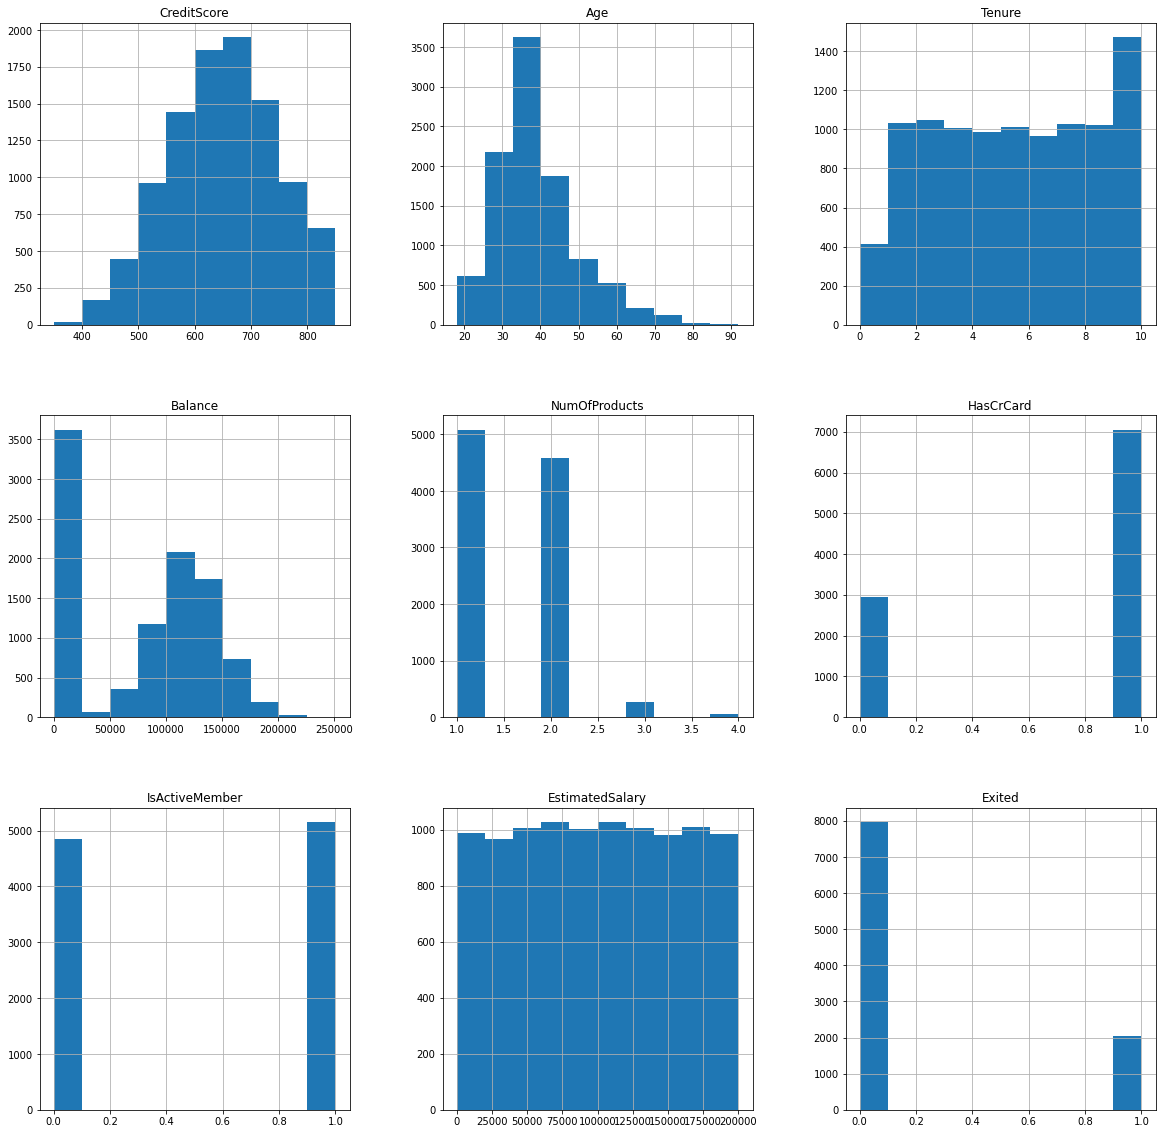

In [11]:
plt.rcParams['figure.figsize'] = (20,20)
df.hist()

Analyse the distribution 'IsActiveMember', 'HasCrCard', 'Geography', and 'Gender' to Exited

In [ ]:
fig, axarr = plt.subplots(2, 2, figsize=(14, 10))
sns.countplot(x='IsActiveMember', hue = 'Exited',data = df, ax=axarr[0][0])
sns.countplot(x='HasCrCard', hue = 'Exited',data = df, ax=axarr[0][1])
sns.countplot(x='Geography', hue = 'Exited',data = df, ax=axarr[1][0])
sns.countplot(x='Gender', hue = 'Exited',data = df, ax=axarr[1][1])


We can observe: 
>Clients who have been with the bank for a short period of time or a long period of time are more likely to churn than those who have been with the bank for a longer period of time.


>Female clients churn at a higher rate than male customers.

>The majority of clients that churned used credit cards.

>The vast majority of the information comes from French citizens. However, the proportion of churned customers is inversely linked to the population of consumers, implying that the bank may be experiencing a difficulty (maybe a lack of customer service personnel) in locations where it has fewer clients.


Correlation Matrix 
From the visualization below we can see that “Age” feature was found to have the strongest relationship with Exited(0.29). Also, there is a strong relationship between exited and balance variable (0.12). 

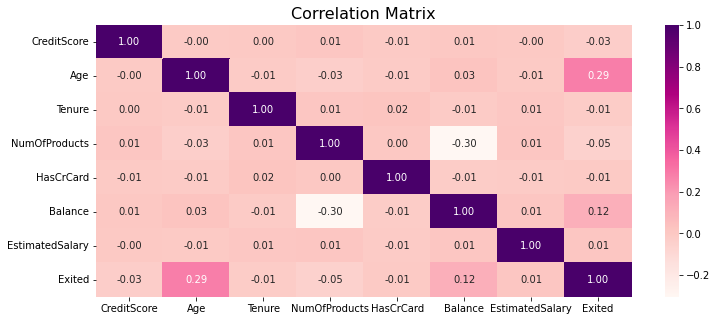

In [13]:
fig, ax = plt.subplots(figsize= [12,5])
g = sns.heatmap(df[["CreditScore","Age","Tenure","NumOfProducts","HasCrCard","Balance", "EstimatedSalary", "Exited"]].corr(),annot=True, fmt = ".2f", ax=ax, cmap = "RdPu")
ax.set_title("Correlation Matrix", fontsize=16)
plt.show()

Basic visualization using a boxplot of the seaborn library to discover the existence of outliers in the 'Age' column. Examine the graphic below to identify the outliers.

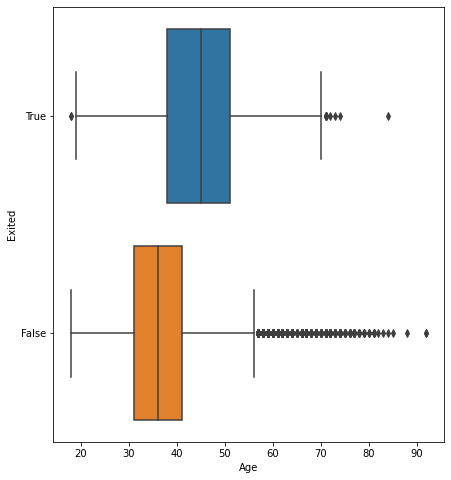

In [14]:
plt.figure(figsize=(7,8))
Exited = df["Exited"].replace({0: "False", 1: "True"}, inplace=False)
sns.boxplot(data = df, x="Age", y=Exited)

In [15]:
len(df['Age'])

10000

From the boxplot above we can see there is some outliers.  To remove the outliers we can used IQR (Inter Quartile Range). Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field.



```
iqr = q3 - q1
```





To define the outlier base value is defined above and below datasets normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :
```
lower= q1-1.5 * iqr
upper = q3 + 1.5 * iqr
```


In [16]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1
lower= q1-1.5 * iqr
upper = q3 + 1.5 * iqr
new_age = df.loc[(df['Age'] > lower) & (df['Age'] < upper)]
len(new_age)

9589

There's not any outliers in Balance.

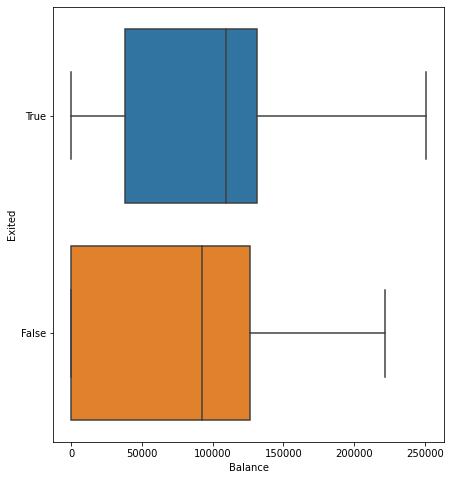

In [17]:
plt.figure(figsize=(7,8))
sns.boxplot(data = df, x="Balance", y=Exited)

The vast majority of the information comes from French citizens. However, the proportion of churned customers is inversely linked to the population of consumers, implying that the bank may be experiencing a difficulty (maybe a lack of customer service personnel) in locations where it has fewer clients.

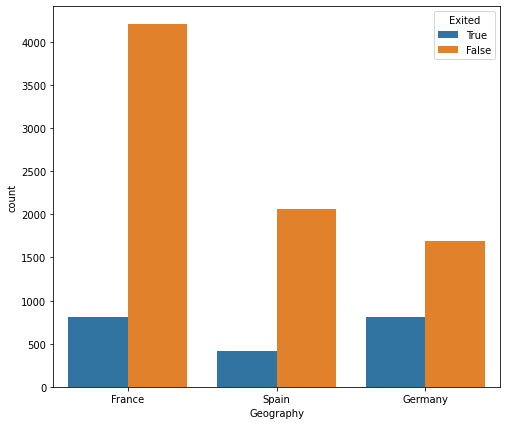

In [18]:
plt.figure(figsize=(8,7))
sns.countplot(data=df, x="Geography", hue=Exited)

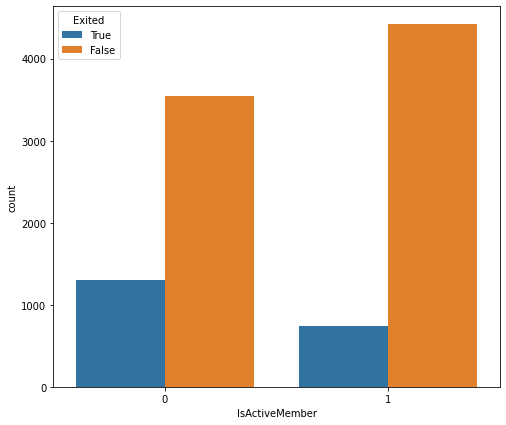

In [19]:
plt.figure(figsize=(8,7))
sns.countplot(data=df, x="IsActiveMember", hue=Exited)

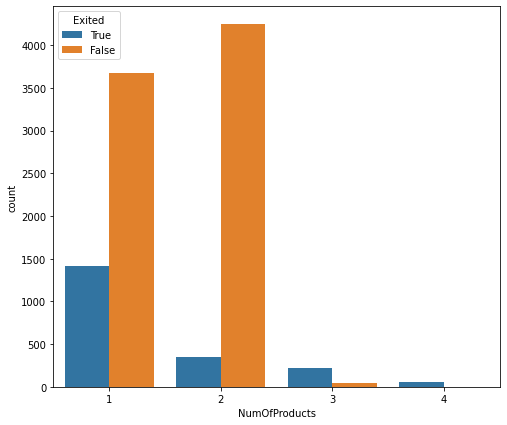

In [20]:
plt.figure(figsize=(8,7))
sns.countplot(data=df, x="NumOfProducts", hue=Exited)

The visualization above shows that clients who buy more than two things have a high rate of loss, however keep in mind that our data is unreliable. All of the consumers (less than 500 people) who purchased 4 products left the bank.

#Encoding Categorical Data

In [21]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

pd.get_dummies(), allows you to easily one-hot encode categorical data.

In [22]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [23]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


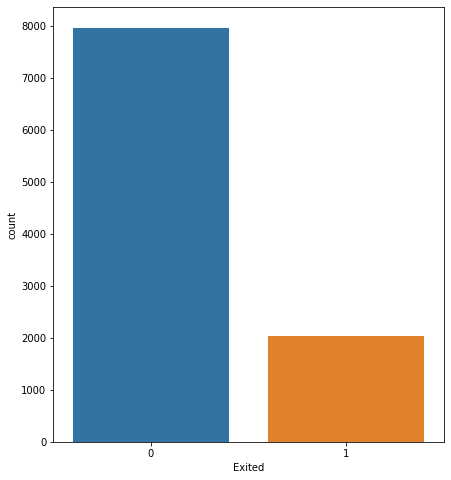

In [24]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 7,8
sns.countplot(df['Exited'])

From the visualizzation above there is   10000  records, of  which 7963 are  non-churners  and 2037 are churners. Therefore, the dataset is highly unbalanced in terms of the proportion of churners and non-churners. 

#Handling imbalance data

---



In [25]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [26]:
from imblearn.over_sampling import SMOTE 
X_smote, y_smote = SMOTE().fit_resample(X, y)
y_smote.value_counts()

1    7963
0    7963
Name: Exited, dtype: int64

Split data

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_smote,y_smote,test_size=0.20,random_state=42)

Feature Scaling 

In [28]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
X_train = standard_scaler.fit_transform(X_train)
X_test = standard_scaler.transform(X_test)


In [29]:
X_train

array([[-0.55414902,  0.61201095,  0.44356708, ..., -0.57529585,
        -0.46675133,  1.1934646 ],
       [ 1.09189443,  0.11011722, -1.40342095, ..., -0.57529585,
        -0.46675133,  1.1934646 ],
       [-0.41243667,  1.01352594,  1.18236229, ..., -0.57529585,
        -0.46675133, -0.83789666],
       ...,
       [ 0.19801653,  0.21049597,  1.18236229, ..., -0.57529585,
        -0.46675133,  1.1934646 ],
       [ 1.15730013,  0.21049597, -1.40342095, ..., -0.57529585,
        -0.46675133, -0.83789666],
       [ 0.52504503,  1.01352594, -1.40342095, ...,  1.73823607,
        -0.46675133,  1.1934646 ]])

#Modeling and Evaluation

**Logistic Regression** 

In [30]:
model1 = LogisticRegression(C=0.03359818286283781, penalty='l1', solver='saga')
model1.fit(X_train, y_train)
prediction1 = model1.predict(X_test)
print(classification_report(y_test, prediction1))

              precision    recall  f1-score   support

           0       0.80      0.77      0.79      1633
           1       0.77      0.80      0.78      1553

    accuracy                           0.78      3186
   macro avg       0.78      0.78      0.78      3186
weighted avg       0.78      0.78      0.78      3186



In [31]:
from sklearn.metrics import accuracy_score
acc_lr = accuracy_score(y_test, prediction1)
print(acc_lr)

0.7843691148775894


In [32]:
print(confusion_matrix(y_test, prediction1))

[[1261  372]
 [ 315 1238]]


In [33]:
roc_lr  = roc_auc_score(y_test, prediction1)
print(roc_lr )

0.7846825909120843


In [34]:
acc_lr = accuracy_score(y_test, prediction1)
recall_lr = recall_score(y_test, prediction1)
precision_lr = precision_score(y_test, prediction1)
f1_score_lr = f1_score(y_test, prediction1)  


**SVM**

In [35]:
from sklearn import svm
model2 = svm.SVC(gamma='auto', probability=True)
model2.fit(X_train,y_train)
prediction2 = model2.predict(X_test)
print(classification_report(y_test, prediction2))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1633
           1       0.83      0.85      0.84      1553

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186



In [36]:
acc_svm = accuracy_score(y_test, prediction2)
recall_svm = recall_score(y_test, prediction2)
precision_svm = precision_score(y_test, prediction2) 
f1_score_svm = f1_score(y_test, prediction2)


In [37]:
print(confusion_matrix(y_test, prediction2))

[[1365  268]
 [ 236 1317]]


In [38]:
roc_svm  = roc_auc_score(y_test, prediction2)
print(roc_svm )

0.8419604668521783


In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC


param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.708 total time=  13.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.695 total time=   8.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.699 total time=   8.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.717 total time=   8.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.711 total time=   8.1s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.827 total time=   4.5s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.811 total time=   4.5s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.827 total time=   4.5s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.826 total time=   4.5s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.823 total time=   4.5s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.798 total time=   5.3s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [40]:
print(grid.best_params_)

print(grid.best_estimator_)

{'C': 1000, 'gamma': 0.01, 'kernel': 'rbf'}
SVC(C=1000, gamma=0.01)


In [41]:
grid.best_estimator_

SVC(C=1000, gamma=0.01)

In [42]:
grid2 = GridSearchCV(estimator=SVC(C=10, gamma=0.1),
             param_grid={'C': [10], 'gamma': [0.1], 'kernel': ['rbf']},
             verbose=3)

In [43]:
grid2.fit(X_train, y_train)
grid_predictions = grid2.predict(X_test)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.826 total time=   8.1s
[CV 2/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.828 total time=   8.0s
[CV 3/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.830 total time=   5.5s
[CV 4/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.838 total time=   6.3s
[CV 5/5] END .......C=10, gamma=0.1, kernel=rbf;, score=0.823 total time=   5.4s


In [44]:
prediction_grid2 = grid2.predict(X_test)
acc_grid_svm = accuracy_score(y_test, prediction_grid2)
print(acc_grid_svm)

0.8436911487758946


In [45]:
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      1633
           1       0.83      0.86      0.84      1553

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186



**Decision Tree**

In [46]:
model3 =  DecisionTreeClassifier()
model3.fit(X_train,y_train)
prediction3 = model3.predict(X_test)
print(classification_report(y_test, prediction3))


              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1633
           1       0.77      0.82      0.79      1553

    accuracy                           0.79      3186
   macro avg       0.79      0.79      0.79      3186
weighted avg       0.79      0.79      0.79      3186



In [47]:
model3 =  DecisionTreeClassifier()
model3.fit(X_train,y_train)
prediction3 = model3.predict(X_test)
print(classification_report(y_test, prediction3))


              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1633
           1       0.77      0.82      0.80      1553

    accuracy                           0.80      3186
   macro avg       0.80      0.80      0.80      3186
weighted avg       0.80      0.80      0.80      3186



In [48]:
acc_dt = accuracy_score(y_test, prediction3)
acc_dt = accuracy_score(y_test, prediction3)
recall_dt = recall_score(y_test, prediction3)
precision_dt = precision_score(y_test, prediction3)
f1_score_dt = f1_score(y_test, prediction3)  
print(acc_dt)

0.7953546767106089


In [49]:
print(confusion_matrix(y_test, prediction3))

[[1261  372]
 [ 280 1273]]


In [50]:
roc_dt = roc_auc_score(y_test, prediction3)
print(roc_dt)


0.7959511034684267


Decision Tree Tuning

In [51]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
dt_model = DecisionTreeClassifier(random_state=0)
search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5, verbose=True)
search.fit(X_train, y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=0),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [52]:
search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.001, max_depth=9, max_features='auto',
                       random_state=0)

In [53]:
dt_model = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=8,
                       max_features='auto', random_state=0)
dt_model.fit(X_train, y_train)
predict_dt = dt_model.predict(X_test)

In [54]:
print(classification_report(y_test, predict_dt ))

              precision    recall  f1-score   support

           0       0.79      0.80      0.80      1633
           1       0.79      0.78      0.78      1553

    accuracy                           0.79      3186
   macro avg       0.79      0.79      0.79      3186
weighted avg       0.79      0.79      0.79      3186



Gradient Boosting Classifier

In [55]:
model4 = GradientBoostingClassifier()
model4.fit(X_train,y_train)
prediction4 = model4.predict(X_test)
print(classification_report(y_test, prediction4))

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1633
           1       0.84      0.85      0.84      1553

    accuracy                           0.84      3186
   macro avg       0.84      0.84      0.84      3186
weighted avg       0.84      0.84      0.84      3186



In [56]:
acc_gb = accuracy_score(y_test, prediction4)
print(acc_gb)

0.844632768361582


In [57]:
print(confusion_matrix(y_test, prediction4))

[[1373  260]
 [ 235 1318]]


In [58]:
roc_gb = roc_auc_score(y_test, prediction4)
print(roc_gb )

0.8447319038393974


###Using GridSearchCV to increase the accuracy in GradientBoosting

In [85]:
parameters = {'learning_rate': [0.01,0.02,0.03],
               'subsample'    : [0.9, 0.5, 0.2],
                'n_estimators' : [100,500,1000],
                'max_depth'    : [4,6,8]
              }

In [60]:
grid_model4 = GridSearchCV(estimator=model4, param_grid = parameters, cv = 2, n_jobs=-1)
grid_model4.fit(X_train, y_train)

GridSearchCV(cv=2, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.02, 0.03],
                         'max_depth': [4, 6, 8],
                         'n_estimators': [100, 500, 1000],
                         'subsample': [0.9, 0.5, 0.2]})

In [61]:
grid_model4.best_estimator_

GradientBoostingClassifier(learning_rate=0.03, max_depth=8, n_estimators=1000,
                           subsample=0.5)

In [62]:
grid_model4.best_score_

0.8524332810047096

In [63]:
grid_model4.best_params_

{'learning_rate': 0.03, 'max_depth': 8, 'n_estimators': 1000, 'subsample': 0.5}

In [64]:
model4_grid = GradientBoostingClassifier(learning_rate=0.03, max_depth=8, n_estimators= 1000, subsample= 0.9)
model4_grid.fit(X_train,y_train)
prediction4_grid = model4_grid.predict(X_test)
print(classification_report(y_test, prediction4_grid))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88      1633
           1       0.87      0.90      0.88      1553

    accuracy                           0.88      3186
   macro avg       0.88      0.88      0.88      3186
weighted avg       0.88      0.88      0.88      3186



In [65]:
acc_gb_grid = accuracy_score(y_test, prediction4_grid)
recall_gb_grid = recall_score(y_test, prediction4_grid)
precision_gb_grid = precision_score(y_test, prediction4_grid)
f1_score_gb_grid = f1_score(y_test, prediction4_grid)  
print(acc_gb_grid)

0.8838669177652229


In [66]:
roc_gb_grid = roc_auc_score(y_test, prediction4_grid)
print(roc_gb_grid )

0.8842352809429155


KNeighbors Classifier

In [67]:
model5 = KNeighborsClassifier(n_neighbors=10)
model5.fit(X_train,y_train)
prediction5 = model5.predict(X_test)
print(classification_report(y_test, prediction5))

              precision    recall  f1-score   support

           0       0.83      0.84      0.83      1633
           1       0.83      0.81      0.82      1553

    accuracy                           0.83      3186
   macro avg       0.83      0.83      0.83      3186
weighted avg       0.83      0.83      0.83      3186



In [68]:
acc_kneighbors = accuracy_score(y_test, prediction5)
recall_kneighbors = recall_score(y_test, prediction5)
precision_kneighbors = precision_score(y_test, prediction5)
f1_score_kneighbors = f1_score(y_test, prediction5)  
print(acc_kneighbors)

0.8267419962335216


In [69]:
print(confusion_matrix(y_test, prediction5))

[[1372  261]
 [ 291 1262]]


In [70]:
roc_knn = (roc_auc_score(y_test, prediction5))
print(roc_knn)

0.8263960988135481


RandomForestClassifier


In [71]:
model6 = RandomForestClassifier(n_estimators=50, max_depth=16, random_state=55, n_jobs=-1)
model6.fit(X_train,y_train)
prediction6 = model6.predict(X_test)
print(classification_report(y_test, prediction6))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1633
           1       0.84      0.87      0.86      1553

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186



In [72]:
acc_rf = accuracy_score(y_test, prediction6)
recall_rf = recall_score(y_test, prediction6)
precision_rf = precision_score(y_test, prediction6)
f1_score_rf = f1_score(y_test, prediction6)  


In [73]:
print(confusion_matrix(y_test, prediction6))

[[1378  255]
 [ 200 1353]]


In [74]:
prediction6 = model6.predict(X_test)
print(classification_report(y_test, prediction6))

              precision    recall  f1-score   support

           0       0.87      0.84      0.86      1633
           1       0.84      0.87      0.86      1553

    accuracy                           0.86      3186
   macro avg       0.86      0.86      0.86      3186
weighted avg       0.86      0.86      0.86      3186



In [75]:
roc_rf = roc_auc_score(y_test, prediction6)
print(roc_rf)

0.8575313410742457


In [76]:
rfc=RandomForestClassifier(random_state=45)
param_grid = { 'n_estimators': [100, 100],
               'max_features': ['auto', 'sqrt', 'log2'],
               'max_depth' : [4,5,6,7,8],
                'criterion' : ['gini', 'entropy']
              }

In [77]:
rfc_grid = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)
rfc_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=45),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 100]})

In [78]:
rfc_grid.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 100}

In [79]:
rfc = RandomForestClassifier(random_state=55, max_features='auto', n_estimators=100, max_depth=8, criterion='gini')

In [80]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, random_state=55)

In [81]:
pred_rfc_grid=rfc.predict(X_test)
print(classification_report(y_test, pred_rfc_grid))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1633
           1       0.83      0.83      0.83      1553

    accuracy                           0.83      3186
   macro avg       0.83      0.83      0.83      3186
weighted avg       0.83      0.83      0.83      3186



In [84]:
models = ['Logistic Regression', 'SVM', 'Decision Tree', 'GradientBoosting', 'KNeighbors', 'Random Forest']
accuracy = [acc_lr, acc_svm, acc_dt, acc_gb_grid, acc_kneighbors, acc_rf]
recall = [recall_lr, recall_svm, recall_dt, recall_gb_grid, recall_kneighbors, recall_rf]
precision = [precision_lr, precision_svm, precision_dt, precision_gb_grid, precision_kneighbors, precision_rf]
f1_score = [f1_score_lr, f1_score_svm, f1_score_dt, f1_score_gb_grid, f1_score_kneighbors, f1_score_rf]
roc_score = [roc_lr, roc_svm, roc_dt, roc_gb_grid, roc_knn, roc_rf]

accuarcy_compare = {'accuracy': accuracy, 'recall': recall, 'precision': precision, 'f1_score': f1_score}
df_metrics = pd.DataFrame(accuarcy_compare, index=models)
df_metrics

,accuracy,recall,precision,f1_score
Logistic Regression,0.784369,0.797167,0.768944,0.782801
SVM,0.841808,0.848036,0.830915,0.839388
Decision Tree,0.795355,0.819704,0.773860,0.796123
GradientBoosting,0.883867,0.898905,0.867620,0.882985
KNeighbors,0.826742,0.812621,0.828628,0.820546
Random Forest,0.857188,0.871217,0.841418,0.856058


Summary : GradientBoosting have the highest accuracy score (88%). 